In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

## Data Visualization

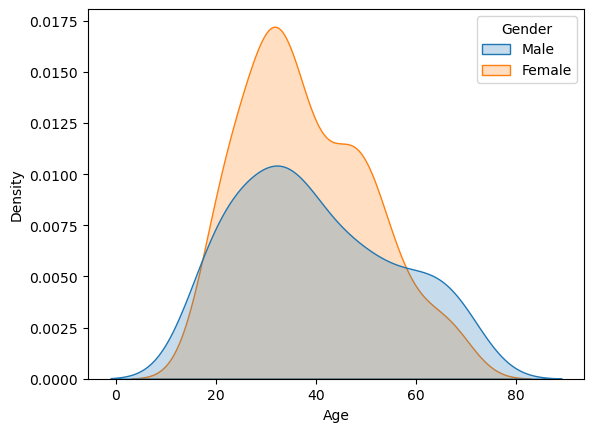

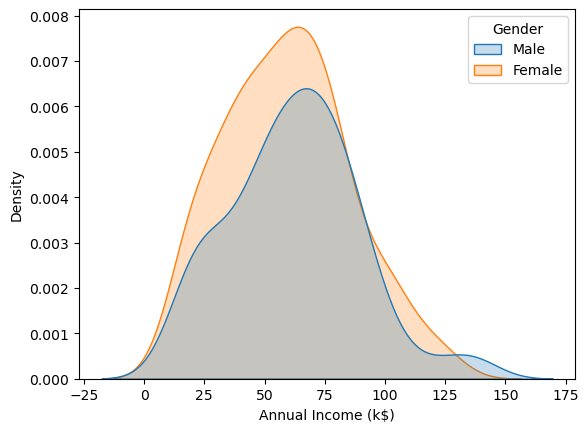

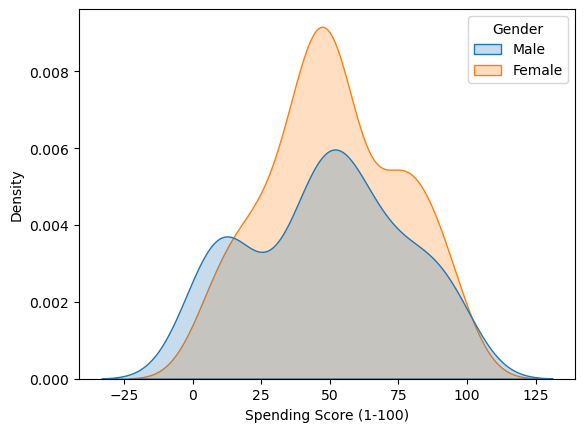

In [39]:
# KDE Plot with  Gender
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data = df, x = df[i],shade=True,hue = df['Gender']);

*Plot Insights*
- The KDE plot above is also depicting the same info as the distribution plot, but with an additional dimension(GENDER).
- When we consider the Age, there is a lot of female customers in the age range 20-40 compared to Males in the same range of age.
- When it comes to Spending Scores of Men we can see that a significant amount of them have very less spending scores.
- Therefore, here we can see the distribution of the data of each numerical columns based on the Gender.
- Also the flat tails indicates the presence of Outliers.
- It is very essential to make a note of this since we are focusing on increasing sales.

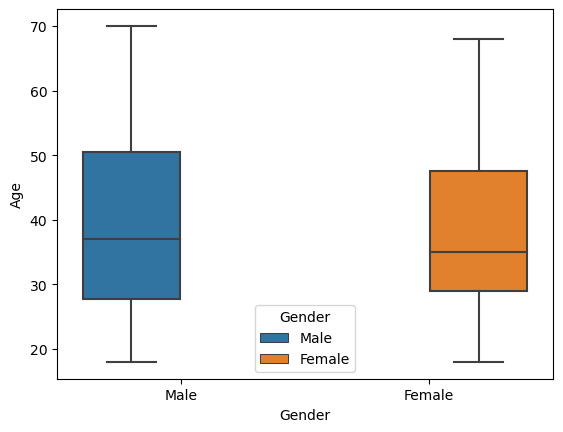

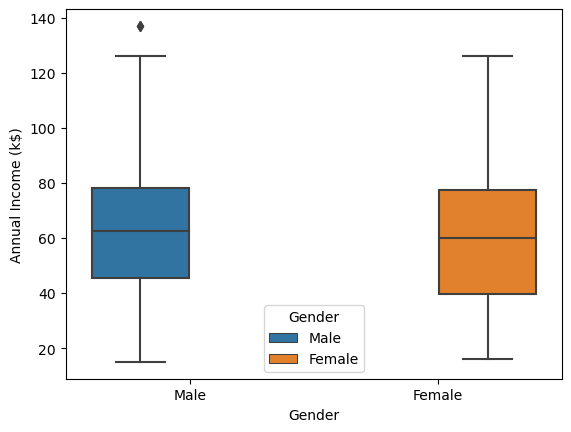

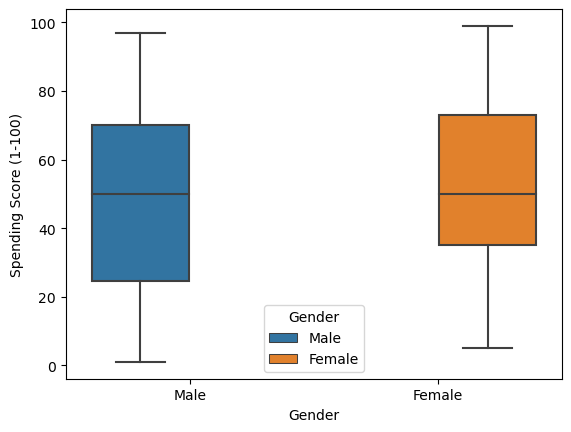

In [40]:
# columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i], hue = 'Gender')

*Plot Insights*
- Age: Median is higher for males than females. Also we can infer that the age of the males who shops have a larger range that of females.
- Income: Here, we can see the presence of an outlier, which also can be confirmed by the flat tail in the KDE plot.
- Spending Score: Here we can infer that the spending scores of Females are lot better than Males, which implies that we need to put more focus on Male products and to improve their scores.

In [41]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

*Data Insights*

- In the data 56% are female and rest 44% are Male.

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

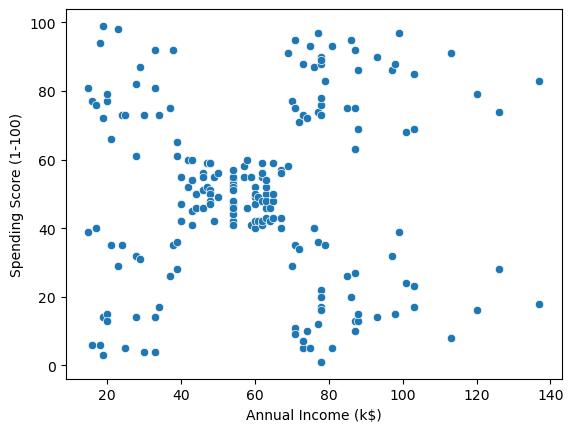

In [42]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

*Plot Insights*
- We can see the clusters in the scatterplot of the Income and Spending Scores.


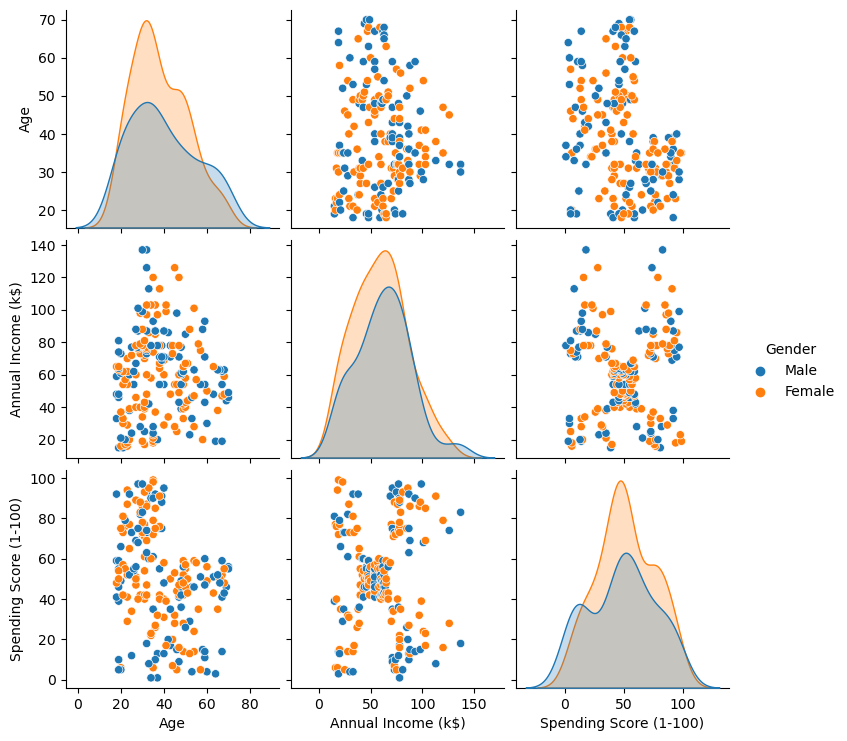

In [43]:
df_pairplot=df.drop('CustomerID',axis=1)
sns.pairplot(df_pairplot,hue='Gender')

In [44]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

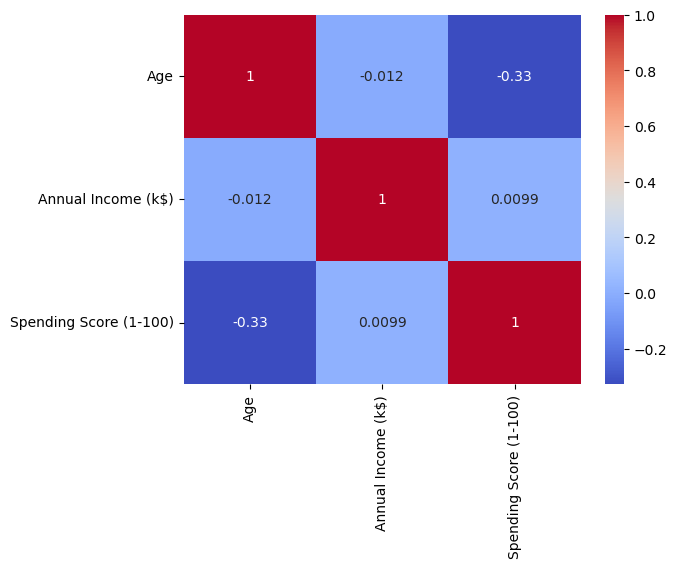

In [45]:
sns.heatmap(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')

*Plot Insights*

- We can see all the columns have very less correlation between each other. It means that there is no significant relationship between the columns. This can negatively impact the clustring process.

## Bivariate Clustering

#### Applying K-Means after Scaling

In [46]:
## Applying Scaling and then Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [47]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Gender_Male             200 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


In [48]:
df1 = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,-0.886405


##### Elbow Method to find K

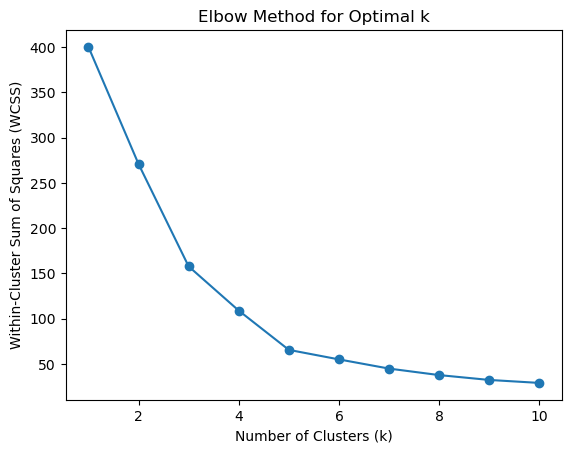

In [49]:
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow Curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

##### Silhoutte Analysis to find K

In [50]:
from sklearn.metrics import silhouette_score
n_clusters_range = range(2, 11)
silhouette_scores = []
X = df1[['Annual Income (k$)', 'Spending Score (1-100)']]
for n_clusters in n_clusters_range:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best number of clusters based on the highest silhouette score
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"Best number of clusters: {best_n_clusters}")
print(f"Corresponding silhouette score: {best_silhouette_score}")

Best number of clusters: 5
Corresponding silhouette score: 0.5546571631111091


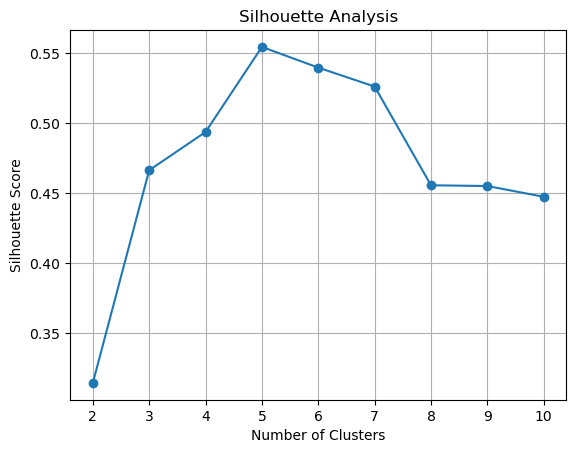

In [51]:
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

*Plot Insights*

- Here the maximum silhoutte score corresponds to K = 5.
- From the elbow method and Silhoutte Analysis we can say that the optimum number of clusters is 5.

### Model Building

In [52]:
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=42)

In [53]:
df['Spending and Income Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [54]:
df['Spending and Income Cluster'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Spending and Income Cluster, dtype: int64

In [55]:
kmeans.inertia_

44448.45544793371

In [56]:
centers =pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


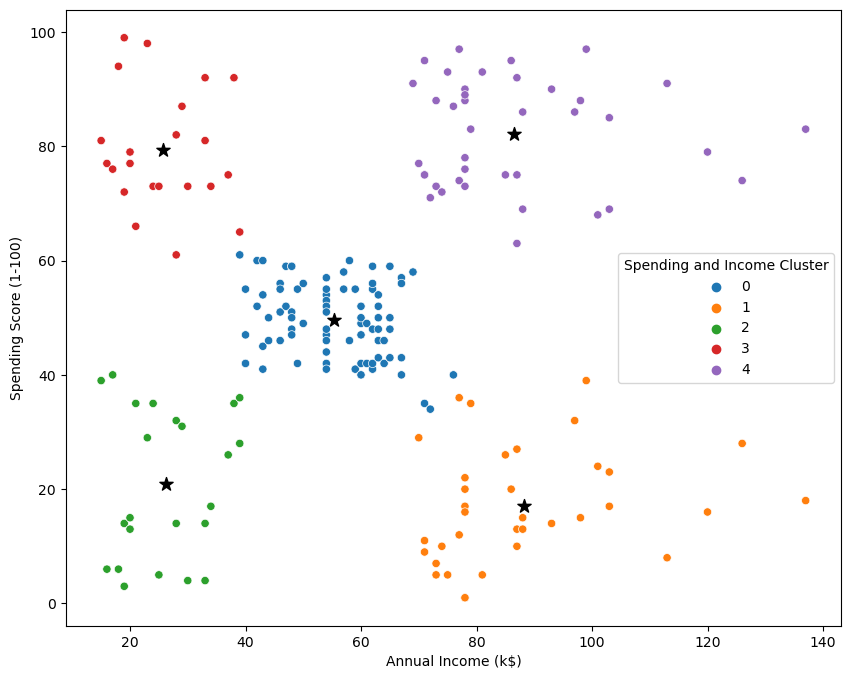

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

*Plot Insights*
- In this plot we can see the presence of 5 clusters and corresponding centers. 
- 5 can be considered as the optimum number of clusters since it's Interita is low compared to other k values.

In [58]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


*Conclusion*

- Here, we get 5 clusters based on the Annual Income and Spending Score of the customer.
- The sales team should focus on Cluster 3 who has more annual income but less spending score.
- Rest all clusters in clusters need to be maintained as it is.